# EXPLORING THE DATA

In this project, we are going to work with data from the **Survey of Consumer Finances (SCF)**. The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic and opinion information about families in the United States. the survey is conducted ever three years and we will work eith an extract of the results from 2009.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from teaching_tools.widgets import ClusterWidget, SCFClusterWidget

## PREPARE DATA

### IMPORT DATA

First, we need to load the data which is stored in a compressed csv file: **SCFP2019.csv**. 

In [2]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "\\Users\\Cheryl\\Documents\\Python Scripts\\Survey of Consumer Finances\\scfp2019excel.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
      
    # extracting all the files
    zip.extractall("\\Users\\Cheryl\\Documents\\Python Scripts\\Survey of Consumer Finances")

File Name                                             Modified             Size
SCFP2019.csv                                   2021-10-19 10:37:30     27093885


In [3]:
# read in the data
df = pd.read_csv("\\Users\\Cheryl\\Documents\\Python Scripts\\Survey of Consumer Finances\\SCFP2019.csv", header=None)
print("data shape:", df.shape)
print("data info:", df.info())
df.head()

data shape: (28886, 351)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28886 entries, 0 to 28885
Columns: 351 entries, 0 to 350
dtypes: object(351)
memory usage: 77.4+ MB
data info: None


C:\Users\Cheryl\AppData\Local\Temp\ipykernel_22236\1424565750.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
0,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
1,1,11,6119.7793077,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
2,1,12,4712.3749124,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,13,5145.2244552,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
4,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2


#### CLEAN

In [4]:
# rename columns and drop unwanted rows and NaN values
df.rename(columns=df.iloc[0], inplace = True)
df = df.drop([0])
df.dropna(inplace = True)
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
1,1,11,6119.7793077,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
2,1,12,4712.3749124,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,13,5145.2244552,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
4,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
5,1,15,4761.8123711,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


The first thing you might notice here is that this dataset is huge - over 20,000 rows and 351 columns! We will not explore all of the featured in this dataset; but you can look in the data dictionary for this project for details and links to the official **CodeBook**. For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save and spend money in the United States.
For this project, we are going to focus on households that have been turned down for credit or feared being denied credit in the past 5 years. These households are identified in the **"TURNFEAR"** column.

In [5]:
# transform "ASSET", "HOUSES" and "DEBT" from object to int
df["ASSET"] = df["ASSET"].astype(int)
df["HOUSES"] = df["HOUSES"].astype(int)
df["DEBT"] = df["DEBT"].astype(int)

#### SUBSET DATA

We will subset the **df** to only households that have been tuned down or feared being tunred doen for credit (**"TURNFEAR == 1"**)

In [6]:
mask = (df["TURNFEAR"] == 1)
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4243, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
2086,419,4191,5603.518083,1,70,5,12,4,2,0,...,1,1,1,1,1,2,2,1,1,1
2087,419,4192,5613.436639,1,70,5,12,4,2,0,...,1,1,1,1,1,2,2,2,1,1
2088,419,4193,5612.099683,1,70,5,12,4,2,0,...,1,1,1,1,1,2,2,2,1,1
2089,419,4194,5597.012336,1,70,5,12,4,2,0,...,1,1,1,1,1,2,2,2,1,1
2090,419,4195,5606.889879,1,70,5,12,4,2,0,...,1,1,1,1,1,2,2,2,1,1


# EXPLORE

### AGE

Now that we have our subset, let's explore the characteristics of this group. One of the features is age group **(AGECL)**

#### AGE GROUPS

In [7]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [5 2 4 3 1 6]


Looking at the **CodeBook** we can see that "AGECL" epresents categorical data, even though the values in the column are numeric.

**AGECL** Age group of the reference person
1. < 35
2. 35 - 44
3. 45 - 54
4. 55 - 64
5. 65 - 74
6. != 75

This simplifies data storage, but it's not vey human readable. So before we create a visualization, let's create a version of this column that uses the actual group names.

In [8]:
# replace age groups with a series "agecl" that contains the observations from "AGECL"
agecl_dict = {
    1 : "Under 35",
    2 : "35 - 44",
    3 : "45 - 54",
    4 : "55 - 64",
    5 : "65 - 74",
    6 : "75 or Older"
}
agecl = df_fear["AGECL"].replace(agecl_dict)
agecl.head()

2086    65 - 74
2087    65 - 74
2088    65 - 74
2089    65 - 74
2090    65 - 74
Name: AGECL, dtype: object

#### AGE GROUP BAR CHART

Now that we have better labels, let's make a bar chart and see the age distribution of our group.

In [9]:
agecl.value_counts()

Under 35       1217
35 - 44        1003
45 - 54         847
55 - 64         690
65 - 74         351
75 or Older     135
Name: AGECL, dtype: int64

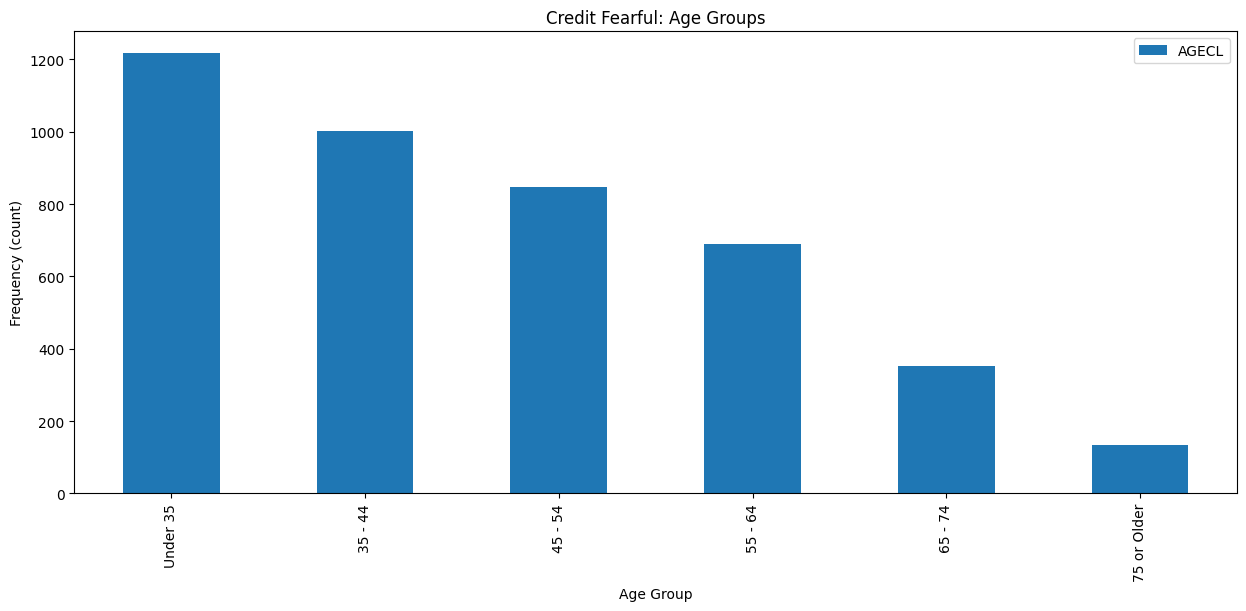

In [10]:
# A bar chart showing the value_counts from **agecl** (age group)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
agecl.value_counts().plot(kind="bar")

# Add labels and title
ax.set_xlabel("Age Group")
ax.set_ylabel("Frequency (count)")
ax.set_title("Credit Fearful: Age Groups")

# Add legend
ax.legend()

# Display the plot
plt.show()

You might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us compressed of 6 bins. Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data. 
To do that, we will need to look at a different variable: **AGE**, whreas **AGECL** was a categorical variable, **AGE** is continuous, so we can use it to make a histogram of our own.

#### AGE HISTOGRAM

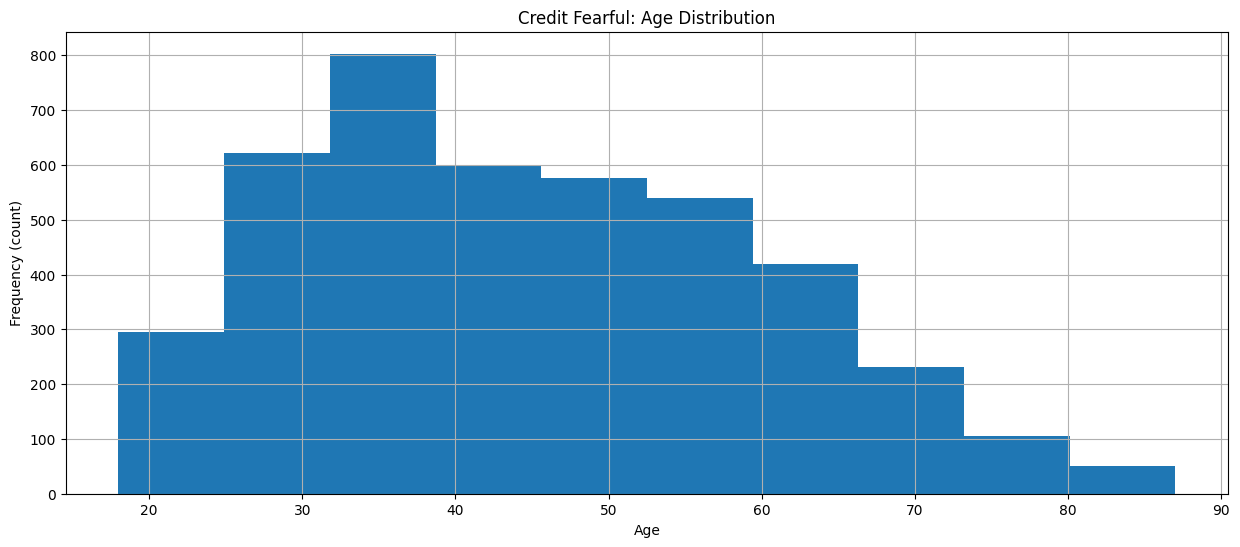

In [11]:
# A histogram of "AGE" with 10 bins
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
df_fear["AGE"].hist(bins=10)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful: Age Distribution")

# Display the plot
plt.show()

It looks like younger people are still concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40 years old.

### RACE

Now that we have an understanding of how age related to our outcome of interest, lets try some other possibilities, starting with race. If we look at the **CodeBook** for "RACE", we can see that there are 4 categories.
1. WHITE (INCLUDE MIDDLE EASTERN/ARAB WITH WHITE)
2. BLACK/AFRICAN-AMERICAN
3. HISPANIC/LATINO
5. OTHER

Note that there's no 4 category here. If a value of 4 did exist, it would be reasonable to assign it to "asian American / Pacific Islander" - a group that doesn't seem to be represented in the dataset. This is a strange omission, but you'll often find that that large public datasets hae these sorts of issues. the important thing is to always read the data dictionary carefully. In this case, remember that this datset doesn't provide a complete picture of race in America - something that we'd have to explain to anyone interested in our analysis.

#### RACE BAR CHART: CREDIT FEARFUL

In [12]:
race_dict = {
    1 : "White/Non Hispanic",
    2 : "Black/African American",
    3 : "Hispanic",
    5 : "Other"
}
race = df_fear["RACE"].replace(race_dict)
race.head()

2086    White/Non Hispanic
2087    White/Non Hispanic
2088    White/Non Hispanic
2089    White/Non Hispanic
2090    White/Non Hispanic
Name: RACE, dtype: object

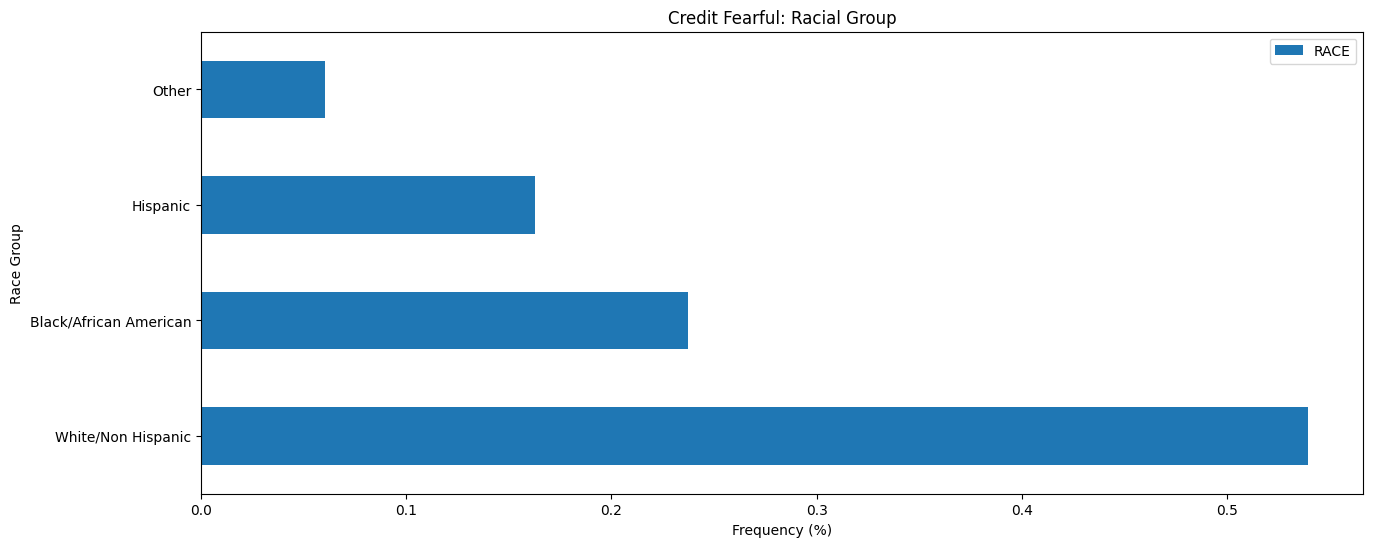

In [13]:
# A horizontal bar chart showing the normaised value counts for "RACE"
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
race.value_counts(normalize=True).plot(kind="barh")

# Add labels and title
ax.set_xlabel("Frequency (%)")
ax.set_ylabel("Race Group")
ax.set_title("Credit Fearful: Racial Group")

# Add legend
ax.legend()

# Display the plot
plt.show()

This suggests that White/Non Hispanic people worry more about being denied credit but thinking critically about what we are seeing, that might be because there are more White/Non Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was speifically drawn to be representative of the population as a whole.

#### RACE BAR CHART: WHOLE DATASET

In [14]:
# Remove extra whitespaces 
df["RACE"] = df["RACE"].str.strip()

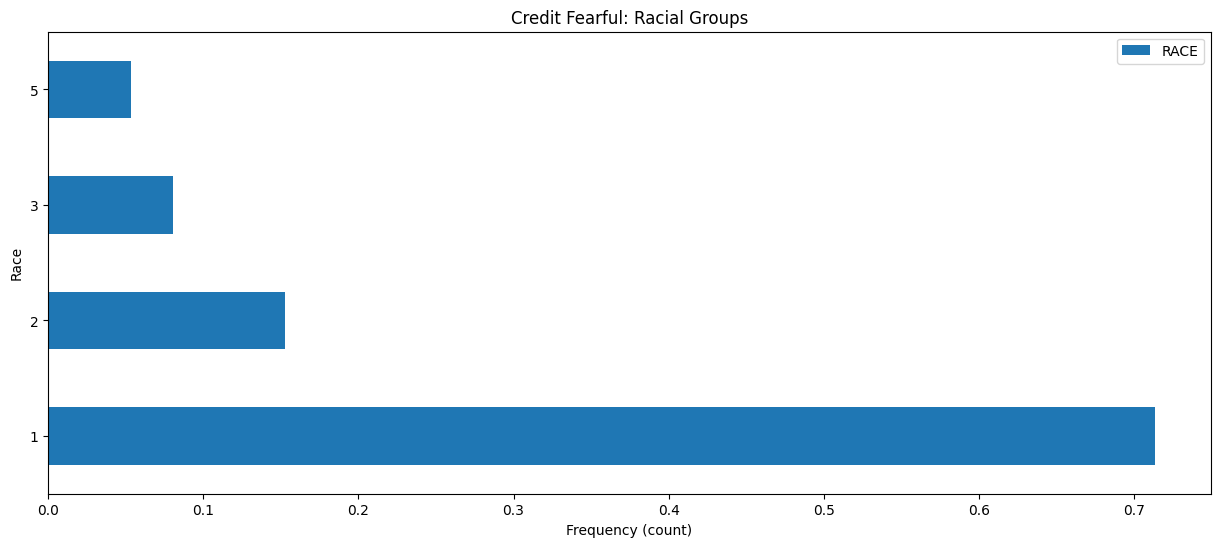

In [15]:
# A horizontal bar chart showing the normaised value counts for "RACE"
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
race = df["RACE"].replace(race_dict)
race.value_counts(normalize=True).plot(kind="barh")

# Add labels and title
ax.set_xlabel("Frequency (count)")
ax.set_ylabel("Race")
ax.set_title("Credit Fearful: Racial Groups")

# Add legend
ax.legend()

# Display the plot
plt.show()

How does this second bar chart change our perception of the first one? On the one hand, we can see that White/Non Hispanic account for around 70% of the whole dataset, but only 54% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 23% of the whole dataset but 40% of Credit Fearful respondents. In other words, Black and Hispanic households are actually more likely to be in the Credit Fearful Group.

**DATA ETHICS:** Its important to note that segmenting customers by race or any other demographic group for the purpose of lending is illegal in the United States. The same thing might be legal elsewhere, but even if its making decisions for things like lending based on racial categories is clearly unethical. This is a great example of how easy it can be to use data science tools to support and propagate systems of inequality. 

### INCOME

What about income level? Are people with lower incomes concerned wbout being denied credit or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our sub group using the "INCCAT"feature, which capyures income percentile groups. This time, though, we will make a single, side by side bar chart.

**INCCAT** Income percentile groups
1. 0 - 20
2. 21 - 39.9
3. 40 - 59.9
4. 60 - 79.9
5. 80 - 89.9
6. 90 - 100

#### INCOME CATEGORIES: CREDIT FEARFUL VS CREDIT FEARLESS

In [16]:
inccat_dict = {
    1 : "0 - 20",
    2 : "21 - 39.9",
    3 : "40 - 59.9",
    4 : "60 - 79.9",
    5 : "80 - 89.9",
    6 : "90 - 100"
}
df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_inccat.head()

,TURNFEAR,INCCAT,frequency
0,0,90 - 100,0.298318
1,0,60 - 79.9,0.173927
2,0,40 - 59.9,0.142187
3,0,0 - 20,0.139929
4,0,21 - 39.9,0.136432


#### INCOME CATEGORIES: SIDE BY SIDE BAR CHART

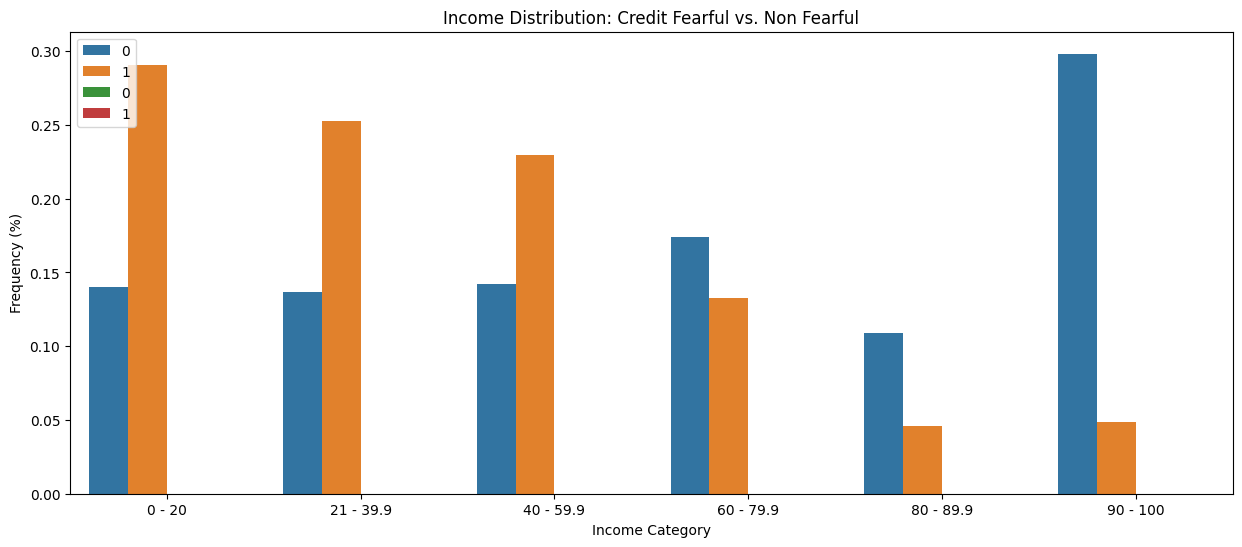

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
sns.barplot(
    x = "INCCAT",
    y = "frequency",
    hue = "TURNFEAR",
    data = df_inccat,
    order = inccat_dict.values()
)

# Add labels and title
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non Fearful")

# Add legend
plt.legend()

# Display the plot
plt.show()

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes.
So based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past 5 years, a plurality of the young and low income had the highest number of respondents that make sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground; so having been denied credit makes them more anxious about the future.

### ASSETS

Not all the data is demographic, though if you were working for a bank, you would probably care less about how old the people are, and more about their ability to carry more debt. If we were going to build a model fro that, we'd want to establish some relationshis among the variables, and making some correlation matrices is a good place to start. 
First, let's zoom out a little bit. We've been looking at only the people who answered "yes" when the survey asked about "TURNFEAR", but what if we looked at everyone instead. To begin with, let's bring in a clear dataset and run a single correlation.

#### ASSETS VS HOME VALUE: WHOLE DATASET

In [18]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.519826460826006


That's a moderate positive correlation, which we would probably expect, right? For many Americans, the vallue of their primary residence makes uo most of the value of their total assets. What about the people in our **TURNFEAR** subset? Let's see if there's a difference in correlation.

#### ASSETS VS HOME VALUE: CREDIT FEARFUL

In [19]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.6801571398223343


### EDUCATION

First, let's start with education levels "EDUC", comparing credit fearful and non-fearful groups.
**EDUC** Highest completed grade by reference person
1. 1st, 2nd, 3rd, or 4th grade
2. 5th or 6th grade
3. 7th and 8th grade
4. 9th grade
5. 10th grade
6. 11th grade
7. 12th grade, no diploma
8. High school graduate - high school diploma or equivalent
9. Some college but no degree
10. Associate degree in college - occupation/vocation program
11. Associate degree in college - academic program
12. Bachelor's degree (for example: BA, AB, BS)
13. Master's degree ( for exmaple: MA, MS, MENG, MED, MSW, MBA)
14. Professional school degree (for example: MD, DDS, DVM, LLB, JD)
15. Doctorate degree (for example: PHD, EDD)
-1. Less than 1st grade

#### EDUCATION: CREDIT FEARFUL VS. CREDIT FEARLESS

In [20]:
# Remove extra whitespaces 
df["EDUC"] = df["EDUC"].str.strip()

In [21]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.283143
1,0,8,0.196161
2,0,13,0.168566
3,0,9,0.117576
4,0,14,0.089982


#### EDUCATION: SIDE BY SIDE BAR CHART

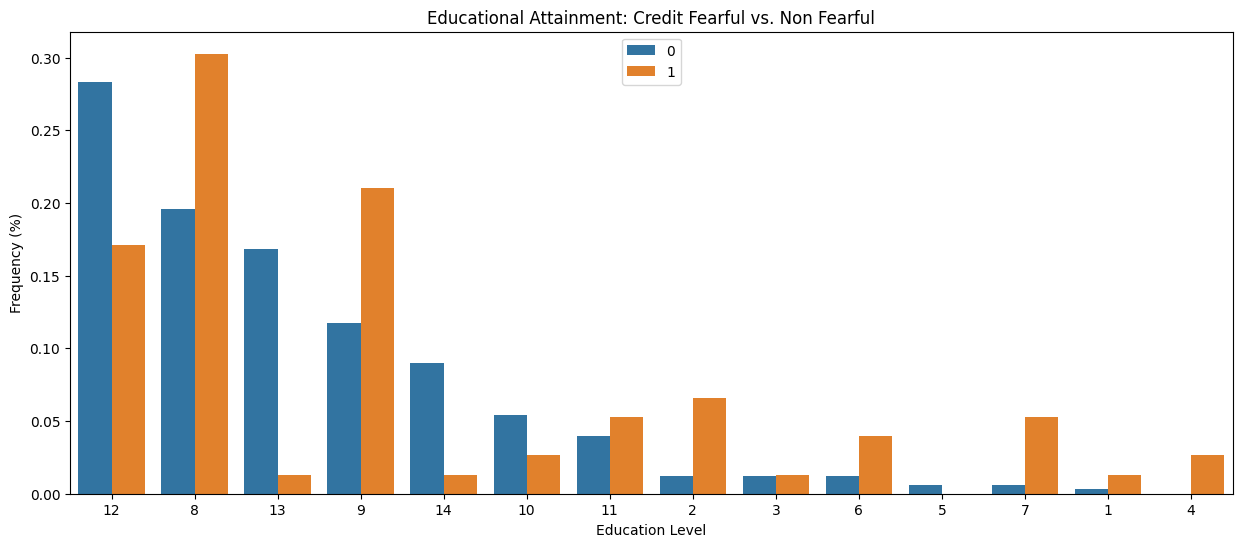

In [22]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the data
sns.barplot(
    x = "EDUC",
    y = "frequency",
    hue = "TURNFEAR",
    data = df_educ,
    order = df_educ["EDUC"].unique()
)

# Add labels and title
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non Fearful")

# Add legend
plt.legend()

# Display the plot
plt.show()

In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

### DEBT

#### ASSETS VS DEBT: WHOLE DATASET

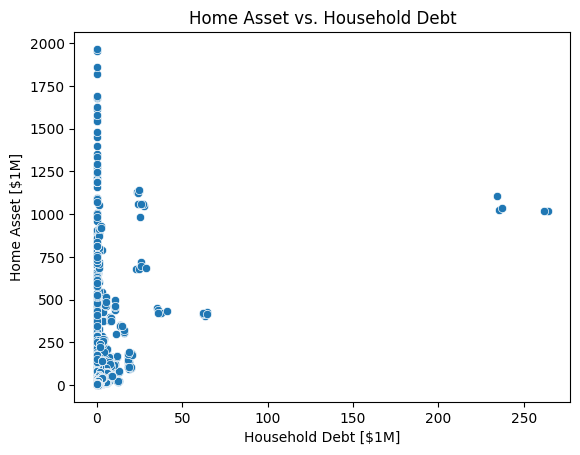

In [23]:
# create scatter plot oF ASSET vs DEBT, df
sns.scatterplot(x = df["DEBT"]/1e6, y = df["ASSET"]/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Asset [$1M]")
plt.title("Home Asset vs. Household Debt");

#### ASSETS VS DEBT: CREDIT FEARFUL

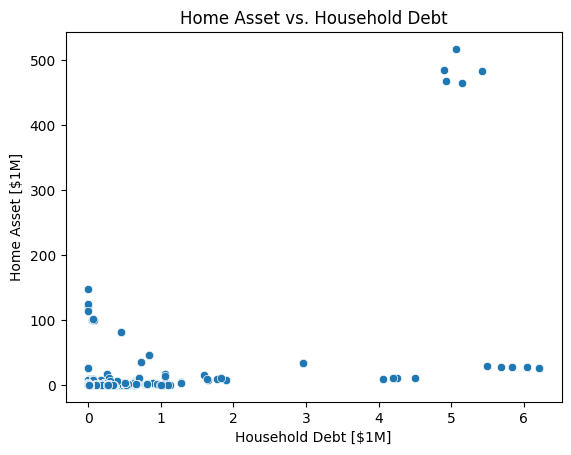

In [24]:
# create scatter plot of ASSET vs DEBT
sns.scatterplot(x = df_fear["DEBT"]/1e6, y = df_fear["ASSET"]/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Asset [$1M]")
plt.title("Home Asset vs. Household Debt");

You can see relationship in our df_fear graph is flatter than one in our df graph, but they are clearly different. Let's end with the most striking difference from our matrices, and make some scatter plaots showing the differnce between **HOUSES** and **DEBT**.

#### HOME VALUE VS DEBT: WHOLE DATASET

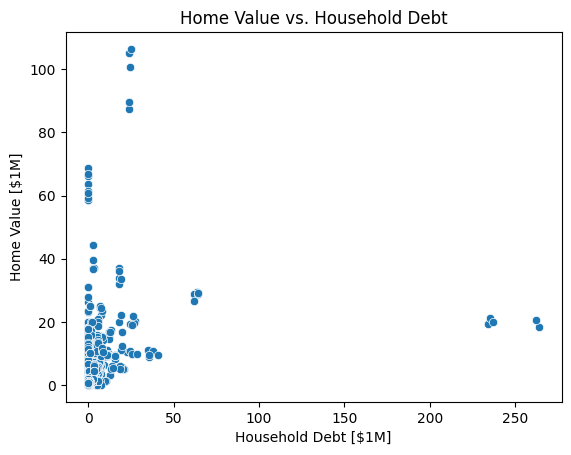

In [25]:
# create scatter plot oF HOUSES vs DEBT
sns.scatterplot(x = df["DEBT"]/1e6, y = df["HOUSES"]/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Home Value vs. Household Debt");

#### HOME VALUE VS DEBT: CREDIT FEARFUL

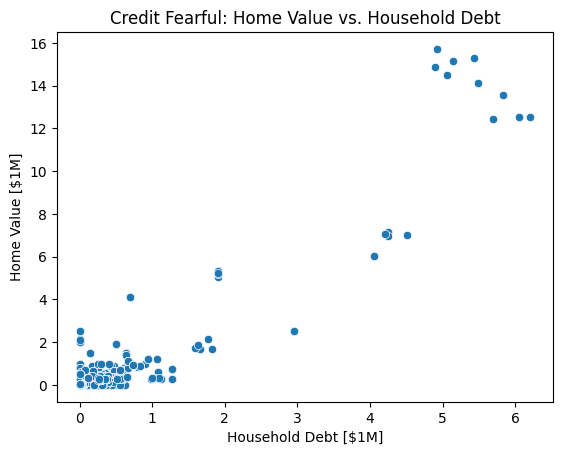

In [26]:
# create scatter plot oF HOUSES vs DEBT
sns.scatterplot(x = df_fear["DEBT"]/1e6, y = df_fear["HOUSES"]/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

The outliers make it a little difficult to see the difference between these two plots; but the relationship is clear enough, our **df_fear** graph shows an almost perfect linear relationship, while our **df** graph shows something a little more muddled. You might also notice that the datapoints on the **df_fear** graph form several little groups. 

# CLUSTERING

### IMPORT

In [27]:
def wrangle (filepath):
    df = pd.read_csv(filepath)
    mask = df["TURNFEAR"] == 1
    df = df[mask]
    
    return df

df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Survey of Consumer Finances\\SCFP2019.csv")
print(df.shape)
df.head()

(4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


### SPLIT

We need to split our data, but we are not going to need taregt vector or a test set this time around. That's becaue the model we'll be building involves unsupervised learning. It's called **unsupervised** because the model does not try to map input to a set of labels or targets that already exist. 

#### VERTICAL SPLIT

In [28]:
X = df[["DEBT", "HOUSES"]]
print(X.shape)
X.head()

(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


#### BUILD MODEL

In [29]:
cw = ClusterWidget(n_clusters=3)
cw.show();

Take a second and run slowly through all the positions on the slider. At the first position, there's a whole bunch of gray datapoints; and if you look carefully, you'll see there are also three stars. Those stars are the **centroids**. At first, their position is set randomly. If you move the slider, one more postion to the right, you'll see all the gray points change colors that correspond to the three clusters.

Since a centroid represents the mean value of all the data in the cluster, we would expect it to fall in the center of whatever cluster it's in. That's what will happen if you move the slider one more position to the right. 

But since they moved, the datapoints might not be in the right clusters anymore. Move the slider again, and you'll see the datapoints redistribute themselves to better reflect the new position of the centroids. The new clusters mean that the centroids also need to move, which will lead to the clusters changing again, and so on, until all the datapoints end up in the right cluster with a centroid that reflects the mean value of all those points.
Let's see what happens when we try the same with our **"DEBT"** and **"HOUSES"** data.

In [30]:
scfc = SCFClusterWidget(x = df["DEBT"], y = df["HOUSES"], n_clusters=3)
scfc.show()

### ITERATE

Now that we've had a chance to play around with the process alittle bit, let's get into how to build a model that does the same thing. 

#### BUILD MODEL

In [31]:
# build model
model = KMeans(n_clusters=3, random_state=42)

# fit model to data
model.fit(X)

C:\Users\Cheryl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

And there it is, 42 datapoints spread across three clusters. let's grab the labels that the model has assigned to the datapoints so we can start making a new visualisation.

#### EXTRACT CLUSTER LABELS AND PLOT CLUSTERS

In [32]:
labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Using the labels we just extracted, let's recreate the scatter plot from before, this time we will color each point according to the cluster to which the model assigned it.

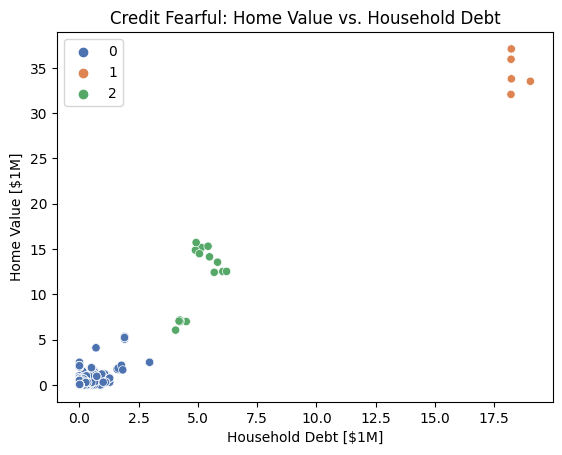

In [33]:
# scatter plot oF HOUSES vs DEBT with hue=labels
sns.scatterplot(
    x = df["DEBT"]/1e6, 
    y = df["HOUSES"]/1e6,
    hue = labels,
    palette = "deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Nice, each cluster has its own color. The centroids are still missing, so let's pull those out.

#### EXTRACT CENTROIDS AND PLOT CENTROIDS

In [34]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328699],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

Let's add the centroids to the graph.

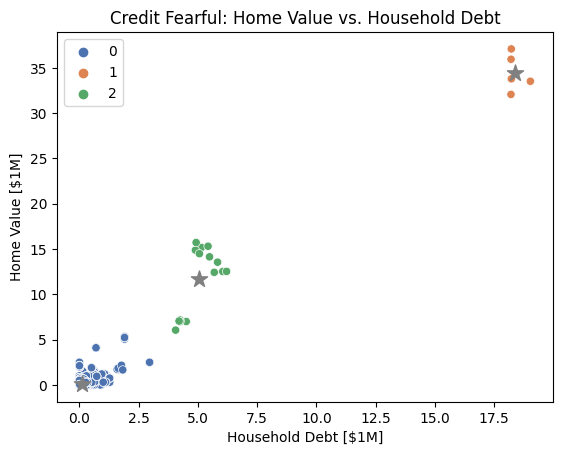

In [35]:
# scatter plot oF HOUSES vs DEBT, add centroids
sns.scatterplot(
    x = df["DEBT"]/1e6, 
    y = df["HOUSES"]/1e6,
    hue = labels,
    palette = "deep"
)

plt.scatter(
    x = centroids[:,0]/1e6,
    y = centroids[:,1]/1e6,
    color = "grey",
    marker = "*",
    s=150
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

That looks great. 

Even though our graph makes it look like the clusters are correctly assigned, we need a numerical evaluation. The data we are using is pretty clear-cut but if things were alittle more muddled, we'd want to run some calculations to make sure we got everything right. There are two metrics that we will use to evaluate our clusters. We will start with **inertia**, which measures the distance between the points within the same cluster.

#### INERTIA

In [36]:
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 939554010797047.4


The **"best"** inertia is 0, and our score is pretty far from that. That does not necessarily mean that our model is bad. Inertia is a measurement of distance like the mean absolute error. This means that the unit of measurement for inertia depends on the unit of measurement of our x- and y-axis.

And since "DEBT" and "HOUSES" are measured in tens of millions of dollars, its not surprising that inertia is so large.

However, it would be helpful to have a metric that was easuer to interpret and that's where **silhouette score** comes in. Silhouette Score measures the distance between different clusters. It ranges from -1 (the worst) to 1 (the best), so its easier to interpret than inertia.

#### SILHOUETTE SCORE

In [37]:
ss = silhouette_score(X, labels)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


Outstanding! **0.976** is pretty close to 1, so our model has done a good job at identifying 3 clusters that are far away from each other. 

Its important to remember that these performance metrics are the result of the muber of clusters we told our model to create. In unsupervised learning, the number of clusters is hyperparameter that you set before training your model. So, what would happen if we change the number of clusters? Will it lead to better performace? Let's try.

#### FINDING THE BEST K

In [38]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# add for loop to train model and calculate inertia, silhouette score
for k in n_clusters:
    # build model
    model = KMeans(n_clusters=k, init="k-means++", n_init="auto", random_state=42)
    # train model
    model.fit(X)
    # calculate inertia
    inertia_errors.append(model.inertia_)
    # calculate ss
    silhouette_scores.append(silhouette_score(X, (model.labels_)))
    
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [3018038313336916.0, 939554010797047.4, 546098841715654.5, 312953826439184.1, 259345573699045.6, 190276466219404.06, 182823496442976.16, 137854230409642.94, 101281028664354.12, 94456305764354.17, 82784036332859.69]

Silhouette Scores: [0.9855099957519555, 0.9768842462944348, 0.9490311483406091, 0.8145735206135484, 0.8098677144717595, 0.7283895532760676, 0.7292682050725934, 0.7303424143073027, 0.733219368089596, 0.7338888149535772, 0.7323568183281238]


Now that we have both performance metrics for several different settings of n_clusters, lets make some line plots to see the relationship between the number of clusters in a model and its inertia and silhouette scores.

#### INERTIA VS. CLUSTER

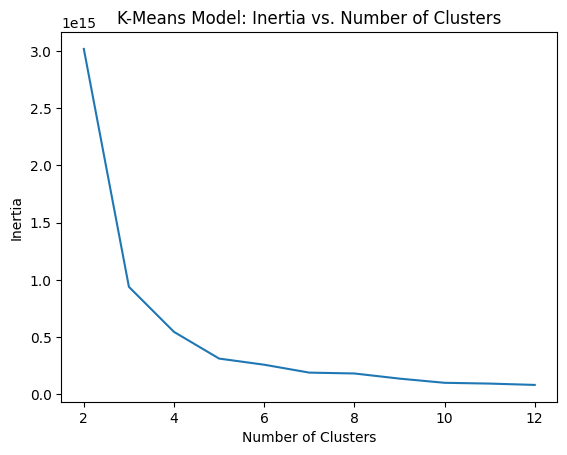

In [39]:
# plot "inertia_errors" by "n_clusters"
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs. Number of Clusters");

What we are seeing here is that, as the number of clusters increase, **inertia** goes down. In fact, we could get inertia to zero (0) if we told our model to make 4,623 clusters (the same observations in X), but those clusters would not be helpful to us.
The trick with choosing the right number of clusters is to look for the **"bend in the elbow"** for this plot. In other words, we want to pick the point where the drop in inertia becomes less dramatc and the line begins to flatten out. In this case, it looks like the sweet spot is 4 or 5.
Let's see what the silhouette score looks like.

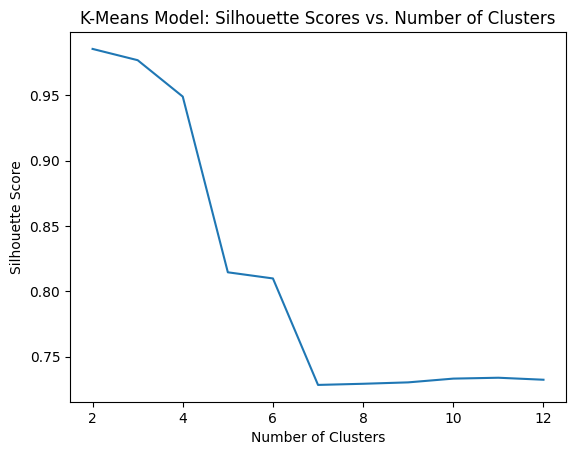

In [40]:
# plot "silhouette_scores" by "n_clusters"
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Scores vs. Number of Clusters");

Note that, in contrast to our inertia plot, bigger is better. So we are not looking for a **"bend in the elbow"** but rather a number of clusters for which the silhouette score still remains high. We can see that silhouette score drops drastically beyond 4 clusters.

Given this and what we saw in the inertia plot, it looks like the optimal number of clusters is **4**.

#### BUILD FINAL MODEL

In [41]:
# build model
final_model = KMeans(n_clusters=4, init="k-means++", n_init="auto", random_state=42)
# fit model to data
final_model.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

#### PLOT FINAL CLUSTERS

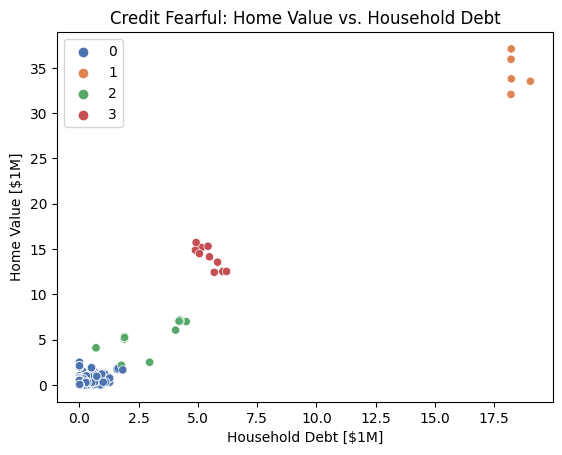

In [42]:
# plot "Home Value" vs "Household Debt" showing clusters in final_model
sns.scatterplot(
    x = df["DEBT"]/1e6, 
    y = df["HOUSES"]/1e6,
    hue = final_model.labels_,
    palette = "deep"
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

We can see all four of our clusters, each differentiated from the rest by color. We are going to make one more visualisation, converting the cluster analysis we just did to something a litte more actionable: a side-by-side bar chart. In order to do that, we need to put our clustered data into a DataFrame.

#### SIDE-BY-SIDE BAR CHART: GET CENTROIDS

In [43]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,2.420929e+06,4.551429e+06
3,5.472800e+06,1.407400e+07


In [44]:
final_model.cluster_centers_

array([[   84886.28951384,   103187.22476564],
       [18384100.        , 34484000.        ],
       [ 2420928.57142857,  4551428.57142857],
       [ 5472800.        , 14074000.        ]])

Do you see any similarities between the **xgb** and **clusters_centers_** DataFrame above?

#### SIDE-BY-SIDE BAR CHART: BUILD CHART

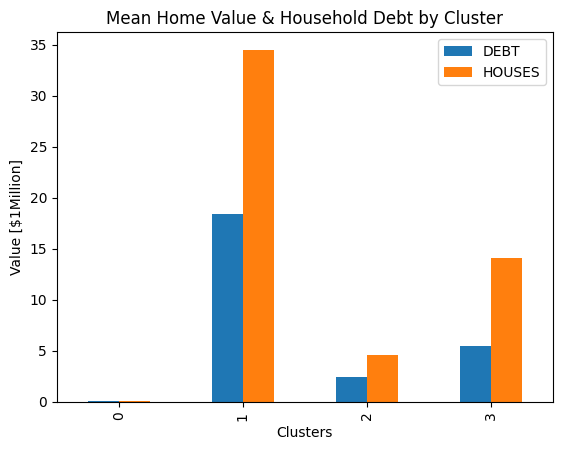

In [45]:
# plot side-by-side bar chart of "xgb"
(xgb/1e6).plot(kind="bar")
plt.xlabel("Clusters")
plt.ylabel("Value [$1Million]")
plt.title("Mean Home Value & Household Debt by Cluster");

The above side-by-side bar from **xgb** chart shows the mean "DEBT" and "HOUSES" values for each of the clusters in the **final_model**.

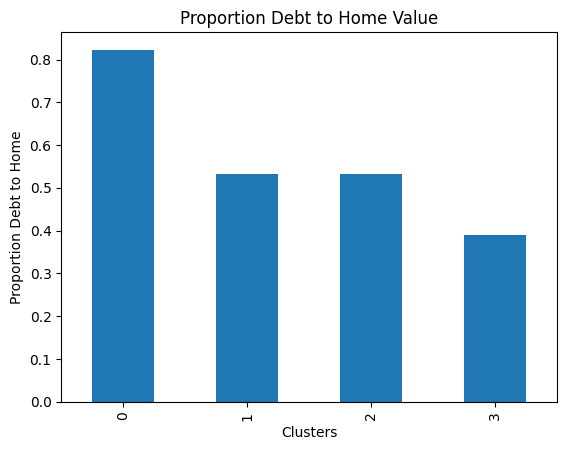

In [46]:
# plot side-by-side bar chart of "xgb"
(xgb["DEBT"]/xgb["HOUSES"]).plot(kind="bar")
plt.xlabel("Clusters")
plt.ylabel("Proportion Debt to Home")
plt.title("Proportion Debt to Home Value");

In this plot, we have our four clusters spread across the x-axis, and the dollar amounts for home value and household debt on the y-axis. 

The first thing to look at in this chart is the different mean home values for the four clusters.

**Cluster 0** represents households with small to moderate home values, **cluster 2 and 3** have high home values, and **cluster 1** has extremely high values.

The second thing to look at is the proportion of debt to home value. In **clusters 1 and 2**, this proportion is around **0.5**. This suggests that these groups have a moderate amount of untapped equity in their homes. But for **group 0**, its almost **1**, which suggests that the largest source  of household debt is their mortgage. **Group 3** is unique in that they have the smallest proportion of dent to home value, around **0.4**.

This information could be useful to a financial institution that wants to target customers with products that would appeal to them. For instance, households in **group 0** might be interested in refinancing their mortgage to lower their interest rates while **group 3** could be interested in a **home equity line of credit**.